<a href="https://colab.research.google.com/github/DataEtnos/estudos_python/blob/main/Tipos_de_agrupamento_no_python_pandas_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px

from sklearn import datasets
from sklearn.preprocessing import scale, minmax_scale, power_transform

from IPython.core.display import HTML
from ipywidgets import interact, widgets

In [3]:
sns.set_theme(
    context='talk',
    style='ticks',
    font_scale=.8,
    rc={
        'figure.figsize': (12,8)
    }
)

In [4]:
#função pra deixar as tabelas na mesma linha (lado a lado)
def display_side_by_side(dataframes:list,titles:list):
    html_str=''
    for df,title in zip(dataframes, titles):
        html_str+=f'<span>{title}:</span>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+="&nbsp"*10
    display(HTML(html_str))

##Tema Central: GroupBy no Pandas


Split, Apply e Combine
Divide o DataFrame em grupos menores (split)

Aplica funções nesses grupos (apply)

Funções de agregação (sum, mean, etc)

Funções de transformação (padronização, filtragem)

Funções customizadas
Combina os grupos transformados de volta em um DataFrame (combine)
Prática

Agrupando por uma ou mais colunas categóricas
Aplicando funções agregadas (mean, max, etc)

Aplicando múltiplas funções de agregação
Usando funções Lambda customizadas

##Criando funções mais complexas para aplicar
Exemplo:
Calcula média da gorjeta como % da conta total
Mostra que mulheres contribuem em média mais proporcionalmente
O resumo cobre os principais tópicos do vídeo, explicando o conceito de GroupBy e trazendo exemplos práticos de uso. Os markdowns de títulos e marcadores ajudam a organizar visualmente as seções.

In [5]:
# Vamos utilizar como exemplo o dataset de gorjetas em um restaurante
df = sns.load_dataset('tips')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [6]:
# Podemos agrupar por uma coluna e aplicar uma função em todas colunas (passíveis de aplicação da função)
df.groupby('sex')['tip'].mean()

sex
Male      3.089618
Female    2.833448
Name: tip, dtype: float64

In [7]:
df.groupby(['time','day'])[['total_bill','tip']].mean()

total_bill       tip
time   day                       
Lunch  Thur   17.664754  2.767705
       Fri    12.845714  2.382857
       Sat          NaN       NaN
       Sun          NaN       NaN
Dinner Thur   18.780000  3.000000
       Fri    19.663333  2.940000
       Sat    20.441379  2.993103
       Sun    21.410000  3.255132

In [8]:
# Podemos aplicar múltiplas funções de agregação suportadas pelo pandas
df.groupby(['time'])['total_bill'].agg(['min','median','max'])

,min,median,max
time,,,
Lunch,7.51,15.965,43.11
Dinner,3.07,18.390,50.81


In [9]:
# Podemos aplicar funções customizadas simples
df.groupby(['time'])[['total_bill']].apply(lambda x: np.sum(x)+1)

,total_bill
time,
Lunch,1168.47
Dinner,3661.30


In [10]:
# Podemos aplicar funções customizadas mais complexas
def mean_diff(subdf):
  """Calcula a média do quanto cada gorjeta representou da conta total"""
  return np.mean( subdf['tip'] / subdf['total_bill'] )

df.groupby('sex').apply(lambda x: str(round(mean_diff(x)*100, 2))+'%')

sex
Male      15.77%
Female    16.65%
dtype: object

In [11]:
def mean_diff(subdf):
  """Calcula a média do quanto cada gorjeta representou da conta total"""
  return np.mean( subdf['tip'] / subdf['total_bill'] )

df.groupby('sex').apply(mean_diff)


sex
Male      0.157651
Female    0.166491
dtype: float64

##Tema central: Group By no Pandas
##Transformação
 Mantém a mesma quantidade de linhas da tabela original
 Mantém a mesma granularidade dos dados

Pode inserir o resultado como uma nova coluna no dataframe
Aplicações

Padronização por grupos (ex: sexo)

Média móvel por grupos para eliminar ruído
Preparar dados para modelagem (ex: agregar vendas diárias em vendas mensais)
Funcionalidades

Retorna um objeto DataFrameGroupBy

Permite aplicar funções como sum(), mean() por grupos

Permite acessar grupos específicos


Permite ver a quantidade de grupos
Permite análises e explorações customizadas
Agregações visuais

Bibliotecas como Seaborn já fazem agregações nos bastidores (ex: soma por grupos)

Mas às vezes precisamos das agregações explicitamente antes da visualização

In [13]:
## -- Transformação -- ##

# Padronização por grupo no caso (sex) esta padronizando e na mesma ordem da coluna original podendo voltar ao data set original .
df.groupby('sex')[['total_bill','tip']].transform(scale)




,total_bill,tip
0,-0.133981,-1.581740
1,-1.128795,-0.963126
2,0.028852,0.276472
3,0.318534,0.148470
4,0.820428,0.673616
...,...,...
239,0.898985,1.906813
240,1.145680,-0.722970
241,0.208954,-0.734070
242,-0.317249,-0.902493


In [19]:
# Rolling mean
df.groupby('sex')[['total_bill','tip']].rolling(3).mean()

total_bill       tip
sex                             
Male   1           NaN       NaN
       2           NaN       NaN
       3     18.343333  2.823333
       5     23.326667  3.840000
       6     19.246667  3.340000
...                ...       ...
Female 226   14.113333  2.500000
       229   16.160000  2.460000
       238   22.680000  3.183333
       240   28.376667  3.183333
       243   27.263333  3.223333

[244 rows x 2 columns]

sex     smoker
Male    Yes       183.07
        No        302.00
Female  Yes        96.74
        No        149.77
Name: tip, dtype: float64


<ipython-input-33-123e6a06626d>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(data=df, x='sex', y='tip', hue='smoker', estimator = np.sum , ci=False)


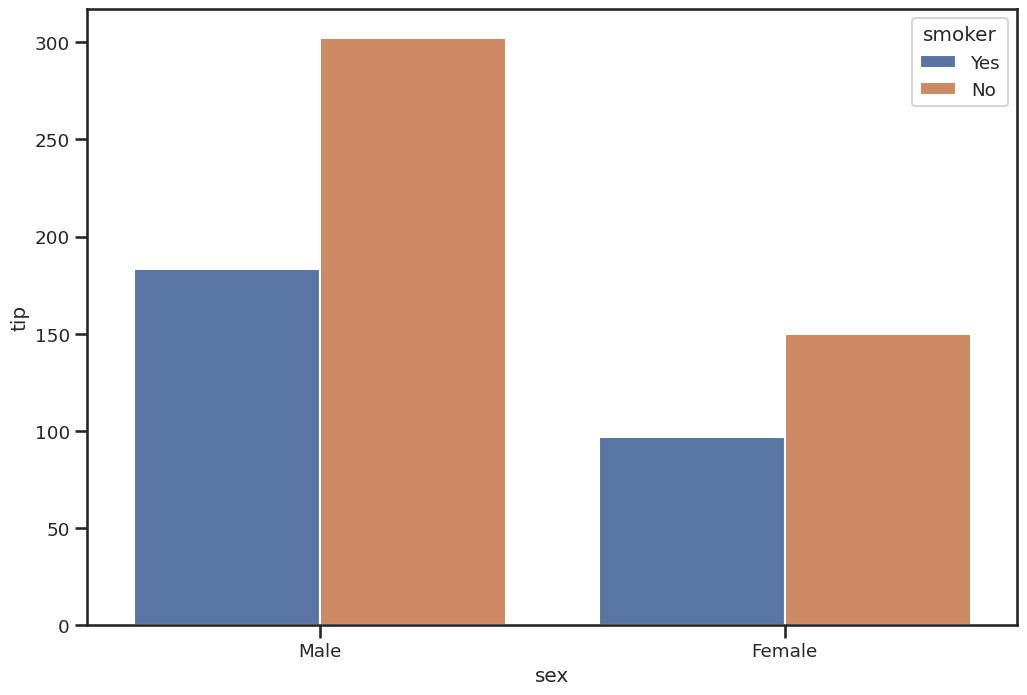

In [33]:
# Exemplo das mesmas informações com groupby e plot

# Groupby
print(df.groupby(['sex','smoker']).tip.sum())

sns.barplot(data=df, x='sex', y='tip', hue='smoker', estimator = np.sum , ci=False)
plt.show()

# Plotly barplot
px.bar(data_frame=df, x='sex', y='tip', color='smoker', barmode="group")